In [13]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
#Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.07407014671808 102.31351280537478
55.23903125046789 -90.01064283580422
83.37637022800874 127.61824479277283
-26.447165839934286 -127.9293667955815
-13.632098136543547 -94.61174985569797
20.48061393348779 160.15419138592154
-58.20625024290028 59.15796032505585
-6.601622303917509 -27.79760017446094
-10.624378221867957 127.64034455401463
-45.20324750658362 -136.39245698291217
-45.0954699911783 148.79969097149734
32.410912111031934 -125.66663356343904
47.164301253874584 -165.61309597233523
-50.330390947577875 -129.1698834209527
10.93757281129946 -112.64703152792391
25.114469310596746 133.97350246870286
-48.97325855990727 -170.8020613944379
-62.023181198898 -40.246008394531856
-28.106042294015445 -45.648528461245945
10.418339835581136 -22.601007727819535
-27.695946700029907 -9.053987466810241
21.365634420462285 51.51168120593118
-20.143038101964265 -9.796434055081505
23.679852582498725 10.801248844894303
85.37630193400443 -144.19857217465778
-32.04037442025893 25.165032788136585
-7.8521

12.605403145529479 128.69490024021002
52.99964552959884 -95.53285899122638
59.18834849720557 83.43714741502862
-87.72542160802453 -58.38966428914331
-77.39679120756071 -143.58015659570867
-68.61762801788677 159.49633607497015
30.166037910644363 -174.40803991456508
-12.654103819644249 176.5023806000808
44.03580532731715 -154.28489187206083
18.91795447813783 52.52320171306059
-56.17115164217684 148.9600021704083
-7.858741968244445 51.51579899064859
-65.97588849626469 59.38724858045714
-21.20938752334301 -21.980264468610756
81.63782709591584 19.686531361836813
-23.88590096005926 54.84907115145853
54.11923615477704 156.85161774118575
-83.78671986323184 160.33246291862298
-25.199602770500007 -173.37532382749652
74.58120909403695 13.42603782917709
-60.275457613678185 -12.680068179358614
11.820068367325902 -29.965279241989748
55.598814356053566 -51.35798781958081
86.39252022385489 -3.064053302221481
-42.16336742758516 131.53490476568925
78.65556353500159 -134.95235823405
-0.8502837708277298 -

-40.88932745620214 -134.2456908099158
66.99547876321853 151.61216536404072
68.38609466723679 -152.1467349595618
39.81811513703016 48.03024503961299
-25.597246410535774 -74.2427666625727
-25.724682087046943 -35.7768143128871
-80.86468539197648 59.15724388171975
-36.98355195944029 163.65802625206277
81.50651654043733 -35.66996539600521
14.309161264479386 40.918179882101896
-63.7303388739748 55.573723152059046
-17.373488984996342 124.15324297971773
-46.31754488393301 -73.00801989428045
59.641821412823475 -43.84135460502148
-33.30850050981879 -108.51759805674189
74.47968787278333 -59.930243372863785
11.24292661869012 148.37271739104784
29.665812877909204 19.86842487960871
-56.990047038715474 162.5318001277617
-63.26068865335658 128.02721050693054
76.69166236910587 -47.58242442996027
-19.46655012754485 122.31763605723586
34.740355255596114 -45.922707225086015
-74.10866667018294 -1.8079425505414974
-78.53783940572174 -171.18443561996995
-49.415276871395854 -26.647637700572687
-35.83775386476

In [17]:
#Import citipy module
from citipy import citipy

In [18]:
# create a list for holding the cities.
cities = []
#identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
#print the city count to confirm sufficient count.
len(cities)

611

In [19]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [24]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sioux lookout
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | cabedelo
Processing Record 9 of Set 1 | atambua
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | pacific grove
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | san patricio
Processing Record 14 of Set 1 | naze
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | florianopolis
Processing Record 18 of Set 1 | praia
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | abu samrah
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | barrow
Processing Reco

Processing Record 41 of Set 4 | cairns
Processing Record 42 of Set 4 | new norfolk
Processing Record 43 of Set 4 | fort nelson
Processing Record 44 of Set 4 | bowen
Processing Record 45 of Set 4 | sungaipenuh
Processing Record 46 of Set 4 | muzhi
Processing Record 47 of Set 4 | blue springs
Processing Record 48 of Set 4 | banda aceh
Processing Record 49 of Set 4 | nalut
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | zhaotong
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | guasdualito
Processing Record 4 of Set 5 | patur
Processing Record 5 of Set 5 | mahibadhoo
Processing Record 6 of Set 5 | safaga
Processing Record 7 of Set 5 | monteagudo
Processing Record 8 of Set 5 | aksu
Processing Record 9 of Set 5 | iquique
Processing Record 10 of Set 5 | imbituba
Processing Record 11 of Set 5 | ostrovnoy
Processing Record 12 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 13 of Set 5 | erenhot
Pr

Processing Record 29 of Set 8 | san policarpo
Processing Record 30 of Set 8 | lac du bonnet
Processing Record 31 of Set 8 | kolpashevo
Processing Record 32 of Set 8 | salalah
Processing Record 33 of Set 8 | sobolevo
Processing Record 34 of Set 8 | saint anthony
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | necochea
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | jiexiu
Processing Record 40 of Set 8 | mount isa
Processing Record 41 of Set 8 | klaksvik
Processing Record 42 of Set 8 | wankaner
Processing Record 43 of Set 8 | galle
Processing Record 44 of Set 8 | pakokku
Processing Record 45 of Set 8 | vari
Processing Record 46 of Set 8 | gigmoto
Processing Record 47 of Set 8 | novokruchininskiy
Processing Record 48 of Set 8 | ulladulla
Processing Record 49 of Set 8 | galgani
City not found. Skipping...
Processing Record 50 of Set 8 | san jeronimo
Processing Record 1

Processing Record 8 of Set 12 | saint paul
Processing Record 9 of Set 12 | phan rang
City not found. Skipping...
Processing Record 10 of Set 12 | kirakira
Processing Record 11 of Set 12 | saiha
Processing Record 12 of Set 12 | sinnamary
Processing Record 13 of Set 12 | kerman
Processing Record 14 of Set 12 | chiali
City not found. Skipping...
Processing Record 15 of Set 12 | bykovo
Processing Record 16 of Set 12 | vallenar
Processing Record 17 of Set 12 | longyan
Processing Record 18 of Set 12 | tapiramuta
Processing Record 19 of Set 12 | kozhva
Processing Record 20 of Set 12 | sao geraldo do araguaia
Processing Record 21 of Set 12 | panjab
Processing Record 22 of Set 12 | menongue
Processing Record 23 of Set 12 | ciudad bolivar
Processing Record 24 of Set 12 | kupang
Processing Record 25 of Set 12 | agirish
Processing Record 26 of Set 12 | plettenberg bay
Processing Record 27 of Set 12 | egvekinot
Processing Record 28 of Set 12 | slave lake
Processing Record 29 of Set 12 | paragominas

In [28]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#Reorder the colums
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-24 16:30:08,42.6001,-73.9662,94.17,41,45,1.01
1,Sioux Lookout,CA,2022-07-24 16:30:37,50.1001,-91.9170,55.47,76,75,10.36
2,Tiksi,RU,2022-07-24 16:31:18,71.6872,128.8694,43.27,83,21,3.22
3,Rikitea,PF,2022-07-24 16:31:18,-23.1203,-134.9692,74.59,78,78,14.38
4,Puerto Ayora,EC,2022-07-24 16:31:15,-0.7393,-90.3518,76.96,83,42,5.99
5,Butaritari,KI,2022-07-24 16:31:19,3.0707,172.7902,81.99,74,24,17.98
6,Cabedelo,BR,2022-07-24 16:31:19,-6.9811,-34.8339,81.27,76,91,21.05
7,Atambua,ID,2022-07-24 16:31:19,-9.1061,124.8925,65.95,76,92,4.34
8,Hobart,AU,2022-07-24 16:30:05,-42.8794,147.3294,47.05,95,61,4.61
9,Pacific Grove,US,2022-07-24 16:31:20,36.6177,-121.9166,56.43,96,71,4.00


In [29]:
#Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

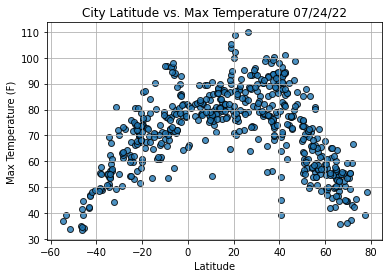

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

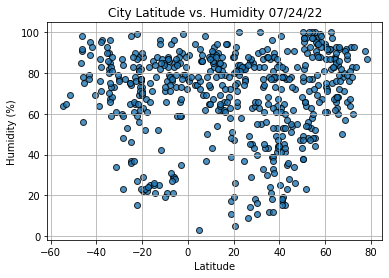

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

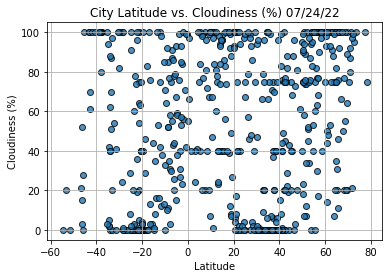

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

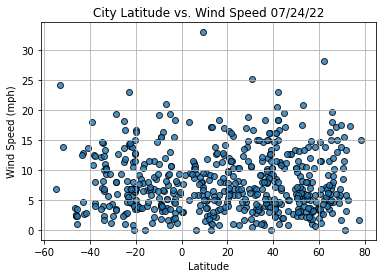

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()